In [194]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
np.random.seed(365)

For the true probability of the games, I chose the red game to have a 0.3, blue game to have 0.5 and the other game to have 0.7 probabilty of winning. 

In [214]:
#We set the true probability of the three games
true_pA = 0.3
true_pB = 0.5
true_pC = 0.7
#Assuming we start with uniform priors for θ_A, θ_B, and θ_C
alphaA,alphaB,alphaC = 1,1,1
betaA,betaB,betaC = 1,1,1

# set up a counter that counts the number of success of each game
count_A, count_B, count_C = 0,0,0
posterior_A = stats.beta(a=alphaA,b=betaA).rvs(size=1)[0]
posterior_B = stats.beta(a=alphaB,b=betaB).rvs(size=1)[0]
posterior_C = stats.beta(a=alphaC,b=betaC).rvs(size=1)[0]

for i in range(500):
    max_prob = np.argmax([posterior_A,posterior_B,posterior_C])
    if max_prob == 0:
        count_A += 1
        #we play game C and update the posterior based on the outcome
        outcome = stats.bernoulli(p=true_pA).rvs(size=1)[0]
        alphaA = alphaA + outcome
        betaA = betaA + 1 - outcome
        posterior_A = stats.beta(a=alphaA,b=betaA).rvs(size=1)[0]
        posterior_B = stats.beta(a=alphaB,b=betaB).rvs(size=1)[0]
        posterior_C = stats.beta(a=alphaC,b=betaC).rvs(size=1)[0]
        
    elif max_prob == 1:
        count_B += 1
        #we play game C and update the posterior based on the outcome
        outcome = stats.bernoulli(p=true_pB).rvs(size=1)[0]
        alphaB = alphaB + outcome
        betaB = betaB + 1 - outcome
        posterior_B = stats.beta(a=alphaB,b=betaB).rvs(size=1)[0]
        posterior_A = stats.beta(a=alphaA,b=betaA).rvs(size=1)[0]
        posterior_C = stats.beta(a=alphaC,b=betaC).rvs(size=1)[0]
    else:
        count_C += 1
        #we play game C and update the posterior based on the outcome
        outcome = stats.bernoulli(p=true_pC).rvs(size=1)[0]
        alphaC = alphaC + outcome
        betaC = betaC + 1 - outcome
        posterior_C = stats.beta(a=alphaC,b=betaC).rvs(size=1)[0]
        posterior_A = stats.beta(a=alphaA,b=betaA).rvs(size=1)[0]
        posterior_B = stats.beta(a=alphaB,b=betaB).rvs(size=1)[0]
print(count_A,count_B,count_C)
Most_played_game = np.argmax([count_A,count_B,count_C])

if Most_played_game == 0:
    print("The most played game is the red game")
    
elif Most_played_game == 1:
    print("The most played game is the blue game")
        
else:
    print("The most played game is the other game")
# From the count of each games, we see that the other gmae is being played the most as count C is the highest. 



9 23 468
The most played game is the other game


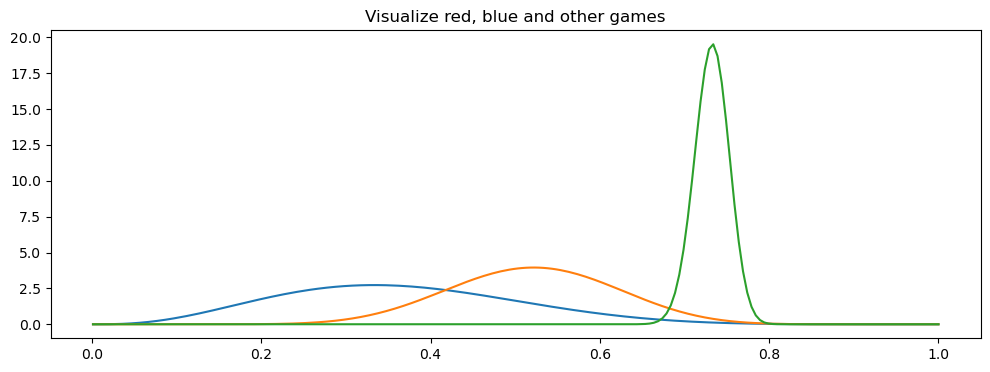

In [218]:
#plot those games and see which one narrows down at the highest theta
parameter_domain = np.linspace(0.001,1,200)
Red = stats.beta(a=alphaA,b=betaA).pdf(parameter_domain)
Blue =stats.beta(a=alphaB,b=betaB).pdf(parameter_domain)


Other = stats.beta(a=alphaC,b=betaC).pdf(parameter_domain)
plt.figure(figsize=(12,4)); plt.plot(parameter_domain, Red, label="Red"); plt.plot(parameter_domain, Blue, label="Blue"); plt.plot(parameter_domain, Other, label="Other"); plt.title("Visualize red, blue and other games"); 

From the plot, we see that the green line, representing the other game, is centered around 0.7 with normal distribution. The green line makes sense as 0.7 being the true probabilty of the other game. We see that the green narrows down around 0.75 which is the highest theta among all three games. It has the highest peak as it is the game that is being played the most. Thus, it would be the best game out of all three games concluded from our algorithm. For further exploitation, we would choose the other game to collect the next data point as it has highest probability of winning. 